In [1]:
  !pip install -U pip
  !pip install -U setuptools wheel
  !pip install autogluon --extra-index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu


In [2]:
 !pip install -U uv

In [3]:
!python -m uv pip install autogluon

Using Python 3.11.13 environment at: /usr
Audited 1 package in 72ms


In [4]:
import autogluon.core
print(autogluon.core.__version__)

1.3.1


In [5]:
# Load the dataset
import pandas as pd
file_path = "/content/drive/MyDrive/Proj 2 /Supplement_Sales_Weekly_Expanded.csv"
df = pd.read_csv(file_path)


In [6]:
from autogluon.timeseries import TimeSeriesPredictor

predictor = TimeSeriesPredictor(target='Revenue')

In [7]:
# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])


In [8]:
# Install AutoGluon if you haven't already
# pip install autogluon

import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

# 📂 Load your data
# df = pd.read_csv('your_data.csv')  # Uncomment and replace with your actual data

# 🧹 Clean and prepare the data
df['Date'] = pd.to_datetime(df['Date'])     # Convert date column to datetime
df = df.sort_values('Date')                 # Make sure it's sorted by time
df['item_id'] = 'supplement'                # Chronos needs an item_id column

# 🪄 Select only relevant columns
df = df[['item_id', 'Date', 'Units Sold', 'Revenue', 'Price', 'Discount']]
df = df.rename(columns={'Date': 'timestamp'})  # Rename date column for Chronos compatibility

# ✅ 1. Add Lag Features
for lag in [1, 2, 4, 12]:  # Weekly lags
    df[f'Revenue_lag_{lag}'] = df.groupby('item_id')['Revenue'].shift(lag)
    df[f'Units_Sold_lag_{lag}'] = df.groupby('item_id')['Units Sold'].shift(lag)

# ✅ 2. Add Rolling Statistics
for window in [2, 4, 12]:  # Rolling windows in weeks
    df[f'Revenue_roll_mean_{window}'] = df.groupby('item_id')['Revenue'].shift(1).rolling(window).mean()
    df[f'Revenue_roll_std_{window}'] = df.groupby('item_id')['Revenue'].shift(1).rolling(window).std()

# ✅ 3. Add Time-Based Features
df['weekofyear'] = df['timestamp'].dt.isocalendar().week
df['month'] = df['timestamp'].dt.month
df['quarter'] = df['timestamp'].dt.quarter
df['dayofweek'] = df['timestamp'].dt.dayofweek

# ✅ 4. Add Promotion/Event Feature
df['on_discount'] = (df['Discount'] > 0).astype(int)

# 🧠 Drop missing values from lag/rolling computations
df = df.dropna()

# 🧠 Create a TimeSeriesDataFrame
ts_df = TimeSeriesDataFrame(df)

# 🏷️ Define the target — we'll forecast Revenue first
predictor_revenue = TimeSeriesPredictor(
    target='Revenue',
    prediction_length=12,         # Forecast 12 weeks ahead
    freq='W'                      # Weekly frequency
)

# 📅 Make predictions
predictor_revenue.fit(train_data=ts_df, time_limit=600)
forecast_revenue = predictor_revenue.predict(ts_df)
# 🖨️ Print results
print("Forecast for Revenue:\n", forecast_revenue)


Frequency 'W' stored as 'W-SUN'
Beginning AutoGluon training... Time limit = 600s
AutoGluon will save models to '/content/AutogluonModels/ag-20250713_012021'
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
GPU Count:          1
Memory Avail:       11.17 GB / 12.67 GB (88.1%)
Disk Space Avail:   68.55 GB / 112.64 GB (60.9%)

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-SUN',
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 12,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'Revenue',
 'time_limit': 600,
 'verbosity': 2}

train_data with frequency 'IRREG' has 

Forecast for Revenue:
                               mean          0.1          0.2          0.3  \
item_id    timestamp                                                        
supplement 2025-04-13  5029.151460  4579.365942  4728.371584  4817.816437   
           2025-04-20  5187.830171  4486.564133  4690.943628  4892.742489   
           2025-04-27  4972.978365  4349.289176  4563.240350  4786.413365   
           2025-05-04  5689.214205  5058.288676  5321.106112  5415.532438   
           2025-05-11  5167.285982  4440.719168  4665.068871  4783.376489   
           2025-05-18  4920.789400  4140.724333  4408.557126  4580.603377   
           2025-05-25  5289.192232  4555.761661  4808.253726  5028.933982   
           2025-06-01  5488.706880  4485.095702  4840.803668  5092.666281   
           2025-06-08  5460.864107  4580.222885  4898.733951  5056.000881   
           2025-06-15  4905.313814  4039.487264  4291.370692  4526.250935   
           2025-06-22  4820.097505  3978.580036  4298

In [ ]:
# ✅ Install AutoGluon if needed:
# pip install autogluon

# 📦 Import packages
import pandas as pd
from datetime import timedelta
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

# 📂 Load your data
# df = pd.read_csv('your_data.csv')  # Replace with your actual data

# 🧹 Preprocess
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df['item_id'] = 'supplement'

# 🪄 Select relevant columns
df = df[['item_id', 'Date', 'Units Sold', 'Revenue', 'Price', 'Discount']]
df = df.rename(columns={'Date': 'timestamp'})

# ✅ Lag features (for Units Sold only)
for lag in [1, 2, 4, 12]:
    df[f'Units_Sold_lag_{lag}'] = df.groupby('item_id')['Units Sold'].shift(lag)

# ✅ Rolling features (for Units Sold only)
for window in [2, 4, 12]:
    df[f'Units_Sold_roll_mean_{window}'] = df.groupby('item_id')['Units Sold'].shift(1).rolling(window).mean()
    df[f'Units_Sold_roll_std_{window}'] = df.groupby('item_id')['Units Sold'].shift(1).rolling(window).std()

# ✅ Time features
df['weekofyear'] = df['timestamp'].dt.isocalendar().week
df['month'] = df['timestamp'].dt.month
df['quarter'] = df['timestamp'].dt.quarter
df['dayofweek'] = df['timestamp'].dt.dayofweek

# ✅ Discount flag
df['on_discount'] = (df['Discount'] > 0).astype(int)

# 🧹 Drop missing values from lag/rolling
df = df.dropna().reset_index(drop=True)

# ✅ Create TimeSeriesDataFrame
ts_df = TimeSeriesDataFrame(df)

# 🔮 Generate future dates for forecasting horizon
last_ts = df['timestamp'].max()
future_dates = pd.date_range(start=last_ts + timedelta(days=7), periods=12, freq='W')

# 📅 Prepare future covariates
future_df = pd.DataFrame({
    'item_id': 'supplement',
    'timestamp': future_dates,
    'Price': df['Price'].iloc[-1],
    'Discount': df['Discount'].iloc[-1],
})

# ⏱️ Time-based covariates
future_df['month'] = future_df['timestamp'].dt.month
future_df['weekofyear'] = future_df['timestamp'].dt.isocalendar().week
future_df['quarter'] = future_df['timestamp'].dt.quarter
future_df['dayofweek'] = future_df['timestamp'].dt.dayofweek
future_df['on_discount'] = (future_df['Discount'] > 0).astype(int)

# 🤖 Forecast Units Sold
predictor_units = TimeSeriesPredictor(
    target='Units Sold',
    prediction_length=12,
    freq='W',
    known_covariates_names=[
        'Price', 'Discount', 'month', 'weekofyear', 'quarter', 'dayofweek', 'on_discount'
    ]
)

predictor_units.fit(train_data=ts_df, time_limit=600)
forecast_units = predictor_units.predict(ts_df, known_covariates=TimeSeriesDataFrame(future_df))

print("\n✅ Forecast for Units Sold:\n", forecast_units)


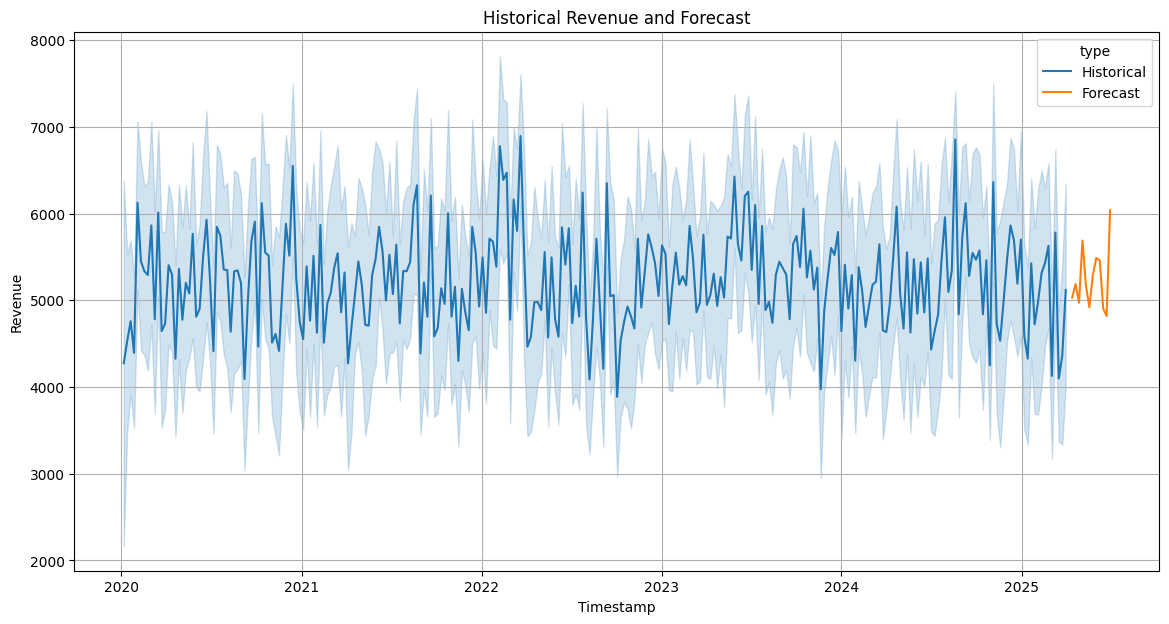

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for Revenue plot
historical_revenue = df[['timestamp', 'Revenue']].copy()
historical_revenue['type'] = 'Historical'

forecast_revenue_plot = forecast_revenue.copy()
forecast_revenue_plot = forecast_revenue_plot.reset_index()
forecast_revenue_plot = forecast_revenue_plot[['timestamp', 'mean']]
forecast_revenue_plot = forecast_revenue_plot.rename(columns={'mean': 'Revenue'})
forecast_revenue_plot['type'] = 'Forecast'

combined_revenue_data = pd.concat([historical_revenue, forecast_revenue_plot])

# Plot Revenue
plt.figure(figsize=(14, 7))
import seaborn as sns
sns.lineplot(data=combined_revenue_data, x='timestamp', y='Revenue', hue='type')
plt.title('Historical Revenue and Forecast')
plt.xlabel('Timestamp')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

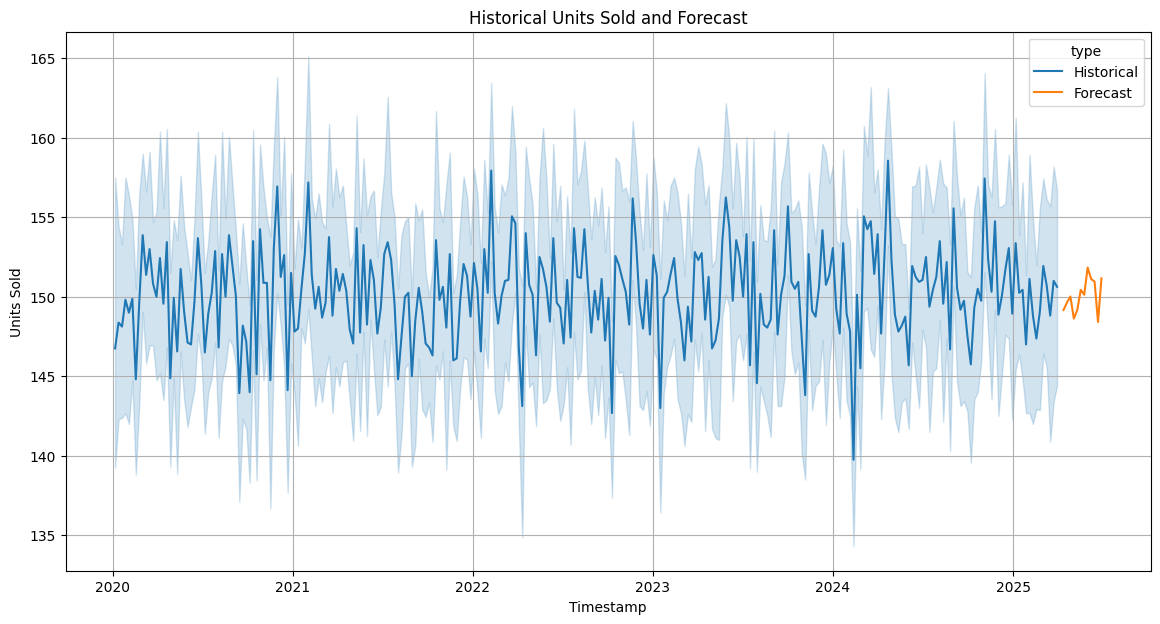

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for Units Sold plot
historical_units = df[['timestamp', 'Units Sold']].copy()
historical_units['type'] = 'Historical'

forecast_units_plot = forecast_units.copy()
forecast_units_plot = forecast_units_plot.reset_index()
forecast_units_plot = forecast_units_plot[['timestamp', 'mean']]
forecast_units_plot = forecast_units_plot.rename(columns={'mean': 'Units Sold'})
forecast_units_plot['type'] = 'Forecast'

combined_units_data = pd.concat([historical_units, forecast_units_plot])

# Plot Units Sold
plt.figure(figsize=(14, 7))
import seaborn as sns
sns.lineplot(data=combined_units_data, x='timestamp', y='Units Sold', hue='type')
plt.title('Historical Units Sold and Forecast')
plt.xlabel('Timestamp')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()